In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
coordinates

[(-12.67133359981706, 21.369708721372973),
 (40.8284453738531, 135.75120537576942),
 (21.476204369154146, 89.89873718944398),
 (-31.819094081999772, 89.01353747293757),
 (-10.453089391924962, 123.88276135442817),
 (50.03337927826482, 69.10843183713922),
 (12.510082873109042, -111.85893514243205),
 (-21.52370194775544, -86.16223430380535),
 (29.62927511132824, -36.00622713372141),
 (67.39835277130635, 42.556375783354525),
 (-67.58052762570051, 93.82608228461567),
 (66.9871539015326, 142.75646423577882),
 (-57.20692495838031, 114.15193530516876),
 (18.388941045857237, -66.90676720745918),
 (-33.93533417504035, -168.74607954377058),
 (-76.4050085061136, -90.54767030610849),
 (23.77205016118674, -73.33980469303825),
 (60.69539472728667, -92.90904555253518),
 (69.98379742379583, -116.47865437015567),
 (-28.94028522732792, -45.09782417300309),
 (-77.49153596117725, -27.982251103315917),
 (-48.583267962409195, -154.10093468822555),
 (44.70422603293929, 57.366844990522424),
 (-48.9875383976973

In [28]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-12.67133359981706 21.369708721372973
40.8284453738531 135.75120537576942
21.476204369154146 89.89873718944398
-31.819094081999772 89.01353747293757
-10.453089391924962 123.88276135442817
50.03337927826482 69.10843183713922
12.510082873109042 -111.85893514243205
-21.52370194775544 -86.16223430380535
29.62927511132824 -36.00622713372141
67.39835277130635 42.556375783354525
-67.58052762570051 93.82608228461567
66.9871539015326 142.75646423577882
-57.20692495838031 114.15193530516876
18.388941045857237 -66.90676720745918
-33.93533417504035 -168.74607954377058
-76.4050085061136 -90.54767030610849
23.77205016118674 -73.33980469303825
60.69539472728667 -92.90904555253518
69.98379742379583 -116.47865437015567
-28.94028522732792 -45.09782417300309
-77.49153596117725 -27.982251103315917
-48.583267962409195 -154.10093468822555
44.70422603293929 57.366844990522424
-48.98753839769733 22.190835431369322
-83.34430722113066 -87.83608502115173
8.624030055036883 104.93392532193377
66.26733955413965 115

-29.130942055280954 134.84344153237953
-52.54337230926483 -10.24163085284519
6.507119087138207 18.455553236222755
-28.58951466367722 17.175970280751983
33.365219325355056 -39.597413645066894
-68.69098442098871 8.825948581700459
57.836834715135524 146.5582384001222
-52.6489460330987 57.507708990436925
88.52133225693584 151.37237480278873
-38.24676102527316 -18.0739053224911
62.534930133281875 85.76423587257784
76.06716399237342 -71.30762074319281
27.38649299750712 -176.79064476537036
-13.878847121258374 -69.9093689266103
-89.12137342570867 -73.39857153555087
65.47828927690128 138.58114219164025
-68.77082733170943 140.9608671837281
0.4892526030992457 -110.75985098890753
-47.51358265535322 99.60568262413017
-2.826831659932651 136.1133536338994
0.2192925116943485 -148.6236972790205
-88.5494841283123 -37.30687143249935
-50.91727954139221 -168.2470680156248
18.07931847750322 23.63096272972487
89.76753335142163 -129.74068053229462
-13.827500220375512 -98.25904947578222
-71.51807685251633 103.

In [29]:
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
# cities[1]

622

In [23]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lumeje
Processing Record 2 of Set 1 | preobrazheniye
Processing Record 3 of Set 1 | mathbaria
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | kupang
Processing Record 6 of Set 1 | atbasar
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | kamenka
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | khonuu
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | quebradillas
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | imbituba
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | mataura
Pr

Processing Record 36 of Set 4 | moranbah
Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | banepa
Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | balimo
City not found. Skipping...
Processing Record 41 of Set 4 | najran
Processing Record 42 of Set 4 | eslov
Processing Record 43 of Set 4 | nioro
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | simao
Processing Record 46 of Set 4 | hualmay
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | pangnirtung
Processing Record 49 of Set 4 | broome
Processing Record 50 of Set 4 | ust-ishim
Processing Record 1 of Set 5 | pacific grove
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | asau
Processing Record 4 of Set 5 | talara
Processing Record 5 of Set 5 | jibuti
Processing Record 6 of Set 5 | barahona
Processing Record 7 of Set 5 | bilma
Processing Record 8 of Set 5 | bichena
Processing Record 9 of Set 5 

Processing Record 25 of Set 8 | gold coast
Processing Record 26 of Set 8 | wanaka
Processing Record 27 of Set 8 | hasaki
Processing Record 28 of Set 8 | the valley
Processing Record 29 of Set 8 | pachino
Processing Record 30 of Set 8 | katsuura
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | sisimiut
Processing Record 33 of Set 8 | buala
Processing Record 34 of Set 8 | shimoda
Processing Record 35 of Set 8 | nouadhibou
Processing Record 36 of Set 8 | igarka
Processing Record 37 of Set 8 | shipunovo
Processing Record 38 of Set 8 | hare bay
Processing Record 39 of Set 8 | cerritos
Processing Record 40 of Set 8 | izhevskoye
Processing Record 41 of Set 8 | quatre cocos
Processing Record 42 of Set 8 | aasiaat
Processing Record 43 of Set 8 | akureyri
Processing Record 44 of Set 8 | scottsbluff
Processing Record 45 of Set 8 | le port
Processing Record 46 of Set 8 | minab
Processing Record 47 of Set 8 | hayvoron
Processing Record 48 of Set 8 | kharan
Processing Record 49

Processing Record 11 of Set 12 | zelenoborsk
Processing Record 12 of Set 12 | bichura
Processing Record 13 of Set 12 | vanimo
Processing Record 14 of Set 12 | todos santos
Processing Record 15 of Set 12 | port macquarie
Processing Record 16 of Set 12 | lolua
City not found. Skipping...
Processing Record 17 of Set 12 | bhera
Processing Record 18 of Set 12 | kerrobert
Processing Record 19 of Set 12 | biswan
Processing Record 20 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 21 of Set 12 | ijaki
City not found. Skipping...
Processing Record 22 of Set 12 | atasu
Processing Record 23 of Set 12 | registro
Processing Record 24 of Set 12 | antofagasta
Processing Record 25 of Set 12 | nizhniy kuranakh
Processing Record 26 of Set 12 | deir hanna
Processing Record 27 of Set 12 | brejo da madre de deus
Processing Record 28 of Set 12 | carauari
Processing Record 29 of Set 12 | cabo san lucas
Processing Record 30 of Set 12 | ryotsu
Processing Record 31 of Set 12 | redkino
Proces

In [38]:
len(city_data)

564

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lumeje,-11.5500,20.7833,79.38,24,6,6.35,AO,2022-06-11 14:29:27
1,Preobrazheniye,42.9019,133.9064,51.48,93,9,1.61,RU,2022-06-11 14:29:27
2,Mathbaria,22.2876,89.9593,83.91,85,92,11.12,BD,2022-06-11 14:29:28
3,Carnarvon,-24.8667,113.6333,70.90,69,2,9.64,AU,2022-06-11 14:29:28
4,Kupang,-10.1667,123.5833,78.01,72,100,14.52,ID,2022-06-11 14:29:28
5,Atbasar,51.8000,68.3333,70.36,45,87,10.18,KZ,2022-06-11 14:29:29
6,San Patricio,28.0170,-97.5169,87.84,64,5,13.06,US,2022-06-11 14:27:14
7,Pisco,-13.7000,-76.2167,60.03,100,100,2.30,PE,2022-06-11 14:29:29
8,Ribeira Grande,38.5167,-28.7000,66.60,82,75,6.91,PT,2022-06-11 14:29:29
9,Kamenka,51.3223,42.7678,72.30,67,85,7.81,RU,2022-06-11 14:29:30


In [47]:
new_column_order = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lumeje,6,AO,2022-06-11 14:29:27,24,-11.5500,20.7833,79.38,6.35
1,Preobrazheniye,9,RU,2022-06-11 14:29:27,93,42.9019,133.9064,51.48,1.61
2,Mathbaria,92,BD,2022-06-11 14:29:28,85,22.2876,89.9593,83.91,11.12
3,Carnarvon,2,AU,2022-06-11 14:29:28,69,-24.8667,113.6333,70.90,9.64
4,Kupang,100,ID,2022-06-11 14:29:28,72,-10.1667,123.5833,78.01,14.52
5,Atbasar,87,KZ,2022-06-11 14:29:29,45,51.8000,68.3333,70.36,10.18
6,San Patricio,5,US,2022-06-11 14:27:14,64,28.0170,-97.5169,87.84,13.06
7,Pisco,100,PE,2022-06-11 14:29:29,100,-13.7000,-76.2167,60.03,2.30
8,Ribeira Grande,75,PT,2022-06-11 14:29:29,82,38.5167,-28.7000,66.60,6.91
9,Kamenka,85,RU,2022-06-11 14:29:30,67,51.3223,42.7678,72.30,7.81


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

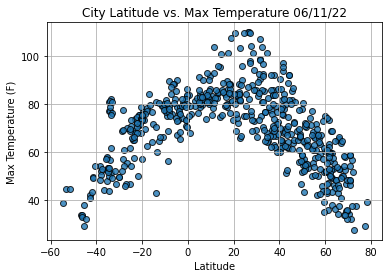

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

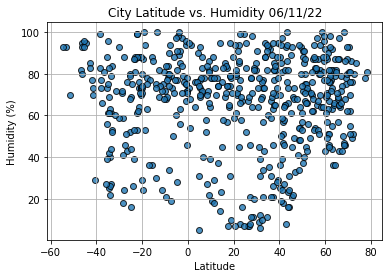

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

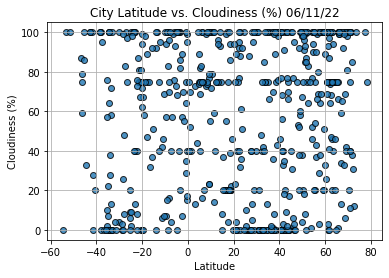

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

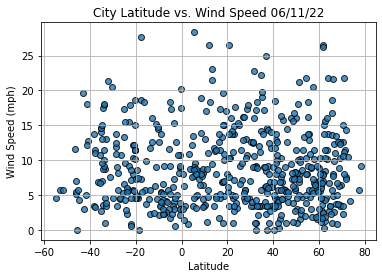

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()